In [1]:
import numpy as np
from glob import glob
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.transforms import Bbox
from matplotlib.patches import ConnectionPatch

# Dados

In [2]:
# arquivos contendo as matrizes de confusão de todos conjuntos de treinamento para cada um dos modelos

print('\n'.join(glob("out/struc*.*")))

out/struc_Elastic-Net.npy
out/struc_kNN.npy
out/struc_L1_penalty.npy
out/struc_L2_penalty.npy
out/struc_LinearSVC.npy
out/struc_NaiveBernoulli.npy
out/struc_NaiveCompl.npy
out/struc_NaiveMulti.npy
out/struc_NearestCentroid.npy
out/struc_Passive_Aggressive.npy
out/struc_Perceptron.npy
out/struc_Random_forest.npy
out/struc_Ridge_Classifier.npy
out/struc_simpleANN.npy


In [6]:
# Modelos
for fname in glob('out/struc*.npy'):
    name =fname.replace('out/struc_', '').replace('.npy', '')
    print(name)

Elastic-Net
kNN
L1_penalty
L2_penalty
LinearSVC
NaiveBernoulli
NaiveCompl
NaiveMulti
NearestCentroid
Passive_Aggressive
Perceptron
Random_forest
Ridge_Classifier
simpleANN


In [8]:
# organiza os dados e output para latex

dic_cm = {}
for fname in glob('out/struc*.npy'):
    name =fname.replace('out/struc_', '').replace('.npy', '')
    cms0 = np.load(fname, allow_pickle=True)
    cond = [(i[0,0]!=0 and i[1,1] != 0) for i in cms0] # Caso com zero convergência!
    cms = cms0[cond]
    print("\\item {} com {} erros.".format(name, 100 - cms.shape[0]))
    dic_cm[name] = {}
    mn = np.mean(cms, axis=0)
    tot = np.sum(mn) /2
    mn = mn / tot
    dic_cm[name]['mean'] = mn
    
    sd = np.std(cms, axis=0) / tot
    dic_cm[name]['sd'] = sd
    prec = mn[1,1]/(mn[1,1]+mn[0,1])
    dic_cm[name]['precision'] = np.mean(cms[:,1,1]/(cms[:,1,1]+cms[:, 0,1]))
    dic_cm[name]['recall'] = np.mean(cms[:,1,1]/(cms[:,1,1]+cms[:, 1,0]))
    dic_cm[name]['precision_sd'] = np.std(cms[:,1,1]/(cms[:,1,1]+cms[:, 0,1]))
    dic_cm[name]['recall_sd'] = np.std(cms[:,1,1]/(cms[:,1,1]+cms[:, 1,0]))
    dic_cm[name]['f1_score'] = np.mean(2*cms[:,1,1]/(2*cms[:,1,1]+cms[:, 0,1]+cms[:, 1,0]))
    dic_cm[name]['f1_score_sd'] = np.std(2*cms[:,1,1]/(2*cms[:,1,1]+cms[:, 0,1]+cms[:, 1,0]))
    

\item Elastic-Net com 0 erros.
\item kNN com 0 erros.
\item L1_penalty com 0 erros.
\item L2_penalty com 0 erros.
\item LinearSVC com 0 erros.
\item NaiveBernoulli com 0 erros.
\item NaiveCompl com 0 erros.
\item NaiveMulti com 0 erros.
\item NearestCentroid com 0 erros.
\item Passive_Aggressive com 0 erros.
\item Perceptron com 0 erros.
\item Random_forest com 0 erros.
\item Ridge_Classifier com 0 erros.
\item simpleANN com 3 erros.


In [9]:
len(dic_cm)

14

In [10]:
#Set f1_plot ranges and curves
for i in range(24):
    f1 = 0.76 + i*0.01 #from 76% up to 99%
    p0 = np.array([])
    r0 = np.array([])
    for j in range(32):
        pi = .70 + 0.01*j #70% is the starting curve precision
        p0 = np.concatenate((p0, [pi])) #concatenate precisions
        r0 = np.concatenate((r0, [1/(2/f1-1/pi)])) #calculate and concatenate precalls
    if i == 0:
        f1_plot = [np.vstack((p0, r0))]
    else:
        f1_plot = np.vstack((f1_plot, [np.vstack((p0, r0))]))
#         p = np.concatenate((p, p0))
#         r = np.concatenate((r, r0))

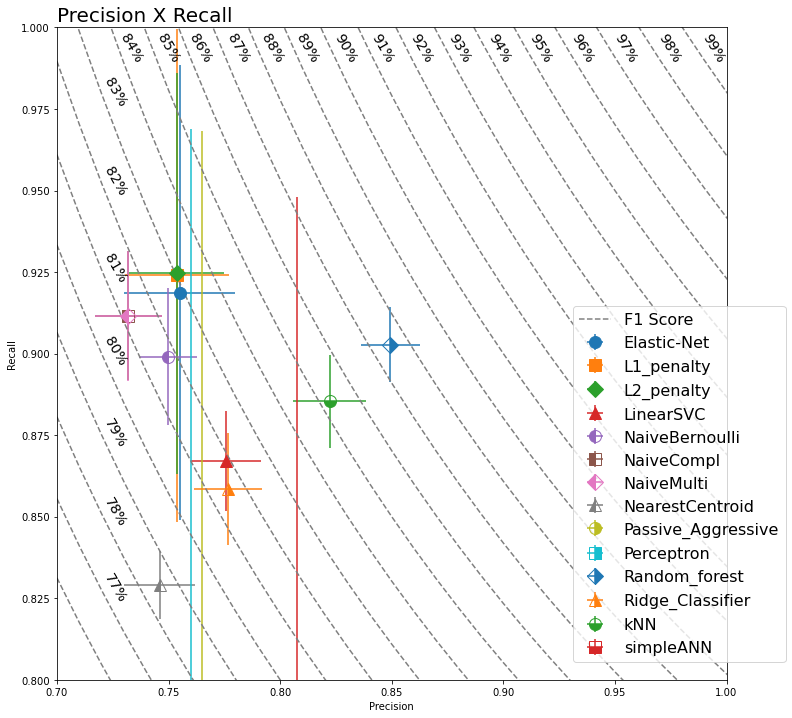

In [12]:
# Precision on X, Recall on Y, SD on error bar
x = np.array([])
y = np.array([])
yerr = np.array([])
xerr = np.array([])
names = []

# Populate Arrays
for name, fields in sorted(dic_cm.items()):
    names.append(name)
    x = np.concatenate((x, [fields['precision']]))
    xerr = np.concatenate((xerr, [fields['precision_sd']]))
    y = np.concatenate((y, [fields['recall']]))
    yerr = np.concatenate((yerr, [fields['recall_sd']]))

# First illustrate basic pyplot interface, using defaults where possible.
ylower = np.maximum(1e-2, y - yerr)
yerr_lower = y - ylower

#Labels, Size and positions
fig = plt.figure(figsize=(12,12))
# fig.subplots_adjust(top=0.9)
ax1 = fig.add_subplot(111) #Main
#Best positions were tried, not calaculated
ax1.set_ylabel('Recall')
ax1.set_xlabel('Precision')

#Types and fill of markers
sc = 1 #scale
marker = ['o', 's', 'D', '^']# alt markers: ['.', 'o', 'p', 'P', 'd', 'D', 'v', '^', '<', '>', 'X', 'x', '*', 's', '2', '1']
# fillstyle=fill_style
fill = ['full', 'left', 'right', 'bottom', 'top', 'none']
cor = ['C{}'.format(i) for i in range(25)]
for i, name in enumerate(names):
    ax1.errorbar(x[i], y[i], yerr=yerr[i]/sc, xerr=xerr[i]/sc, fmt=marker[i % 4],  label=name, color=cor[i],
        ecolor=cor[i], capthick=1, markersize=12, fillstyle=fill[i // 4])

#F1-Score lines and text
for j, i in enumerate(f1_plot):
    f1 = '{:.0%}'.format(0.76 + j*0.01) #F1 
    n = 2
    if j == 0:
        ax1.plot(i[0], i[1], '--', color='gray', label='F1 Score')
    else:
        ax1.plot(i[0], i[1], '--', color='gray')
#     ax2.plot(i[0], i[1], '--', color='gray')
        
    temp = i[1,n]
    while temp >= 1: # ignore points above 100%
        n += 1
        if n < i.shape[1]:
            temp = i[1,n]
        else:
            break
            
    if n < i.shape[1] and j > 0 and i[1,n] >0: #F1-score text position
        if n > 2:
            yt = 0.993
            dxt = ((0.993) - i[1, n])*0.707
        else:
            yt = i[1,n]
            dxt = 0
        ax1.text(i[0,n]-dxt, yt-0.0035, f1, fontsize=14, rotation=-60)

#Plot limits
ax1.set_xlim(.7, 1)
ax1.set_ylim(.8, 1)

ax1.set_title("Precision X Recall", loc='left', fontdict={'fontsize': 20})
ax1.legend(loc='right',bbox_to_anchor=(0, 0., 1.1, 0.6), fontsize=16)

#plot
plt.show()


# subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

# left  = 0.125  # the left side of the subplots of the figure
# right = 0.9    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots

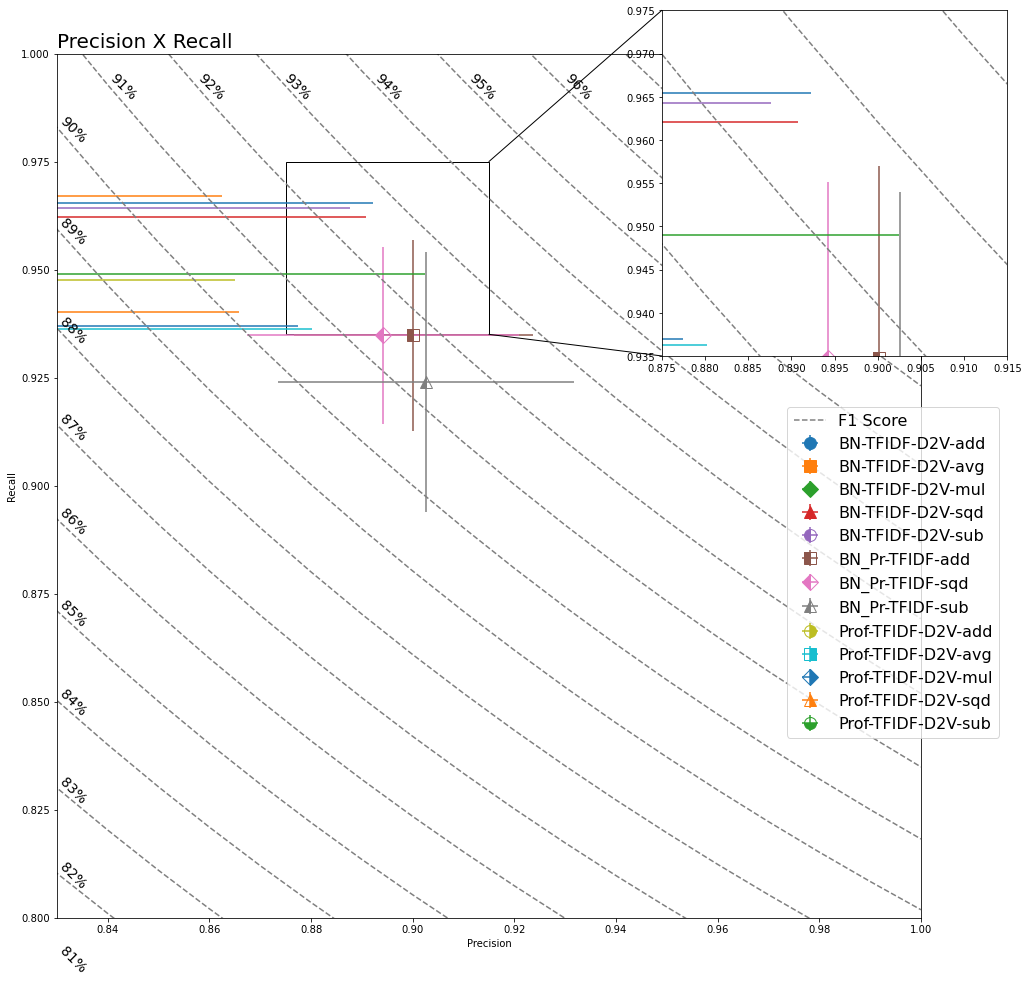

In [28]:
# Precision on X, Recall on Y, SD on error bar
x = np.array([])
y = np.array([])
yerr = np.array([])
xerr = np.array([])
names = []

# Populate Arrays
for name, fields in sorted(dic_cm.items()):
    names.append(name)
    x = np.concatenate((x, [fields['precision']]))
    xerr = np.concatenate((xerr, [fields['precision_sd']]))
    y = np.concatenate((y, [fields['recall']]))
    yerr = np.concatenate((yerr, [fields['recall_sd']]))

# First illustrate basic pyplot interface, using defaults where possible.
ylower = np.maximum(1e-2, y - yerr)
yerr_lower = y - ylower

#Labels, Size and positions
fig = plt.figure(figsize=(12,12))
# fig.subplots_adjust(top=0.9)
ax1 = fig.add_subplot(111) #Main
ax2 = fig.add_subplot(211) #Detailed
#Best positions were tried, not calaculated
ax1.set_position(Bbox(np.array([[0,0], [1,1]])))
ax2.set_position(Bbox(np.array([[.7,.65], [1.1,1.05]])))
ax1.set_ylabel('Recall')
ax1.set_xlabel('Precision')

#Types and fill of markers
sc = 1 #scale
marker = ['o', 's', 'D', '^']#['.', 'o', 'p', 'P', 'd', 'D', 'v', '^', '<', '>', 'X', 'x', '*', 's', '2', '1']
# fillstyle=fill_style
fill = ['full', 'left', 'right', 'bottom', 'top', 'none']
cor = ['C{}'.format(i) for i in range(25)]
for i, name in enumerate(names):
    ax1.errorbar(x[i], y[i], yerr=yerr[i]/sc, xerr=xerr[i]/sc, fmt=marker[i % 4],  label=name, color=cor[i],
        ecolor=cor[i], capthick=1, markersize=12, fillstyle=fill[i // 4])
    ax2.errorbar(x[i], y[i], yerr=yerr[i]/sc, xerr=xerr[i]/sc, fmt=marker[i % 4],  label=name, color=cor[i],
        ecolor=cor[i], capthick=1, markersize=12, fillstyle=fill[i // 4])

#F1-Score lines and text
for j, i in enumerate(f1_plot):
    f1 = '{:.0%}'.format(0.8 + j*0.01) #F1 
    n = 4
    if j == 0:
        ax1.plot(i[0], i[1], '--', color='gray', label='F1 Score')
    else:
        ax1.plot(i[0], i[1], '--', color='gray')
    ax2.plot(i[0], i[1], '--', color='gray')
        
    temp = i[1,n]
    while temp >= 1: # ignore points above 100%
        n += 1
        if n < i.shape[1]:
            temp = i[1,n]
        else:
            break
            
    if n < i.shape[1] and j > 0 and i[1,n] >0: #F1-score text position
        if n > 4:
            yt = 0.993
            dxt = ((0.993) - i[1, n])*0.707
        else:
            yt = i[1,n]
            dxt = 0
        ax1.text(i[0,n]-dxt, yt-0.0035, f1, fontsize=14, rotation=-45)

#Plot limits
ax1.set_xlim(.83, 1)
ax1.set_ylim(.8, 1)

ax2.set_xlim(.875, .915)
ax2.set_ylim(.935, .975)

ax1.set_title("Precision X Recall", loc='left', fontdict={'fontsize': 20})
ax1.legend(loc='best',bbox_to_anchor=(0, 0., 1.1, 0.6), fontsize=16)

# Create a Rectangle patch with connection
rect = patches.Rectangle((.875,.935),.04,.04,linewidth=1,edgecolor='k',facecolor='none')
ax1.add_patch(rect)

con = ConnectionPatch(xyA=(.875,.975), xyB=(.915,.975), coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1, color="black")
ax2.add_artist(con)


con = ConnectionPatch(xyA=(.875,.935), xyB=(.915,.935), coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1, color="black")
ax2.add_artist(con)

#plot
plt.show()


# subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

# left  = 0.125  # the left side of the subplots of the figure
# right = 0.9    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots

x.875,.925
y..925,.975

In [15]:
from matplotlib.lines import Line2D
for i in Line2D.fillStyles:
    print(i, end=', ')

full, left, right, bottom, top, none, 

# Para tabela em LATEX

In [18]:
print('{} & {}'.format('Method', 'Média',), end='')
print('{} & {} & {} & {} \\\\ \\{}'.format('', 'Precisão', 'Recall', 'F1-Score', 'cline{1-4}'))
for i, name in enumerate(names):
    dic_t = dic_cm[name]
    print('{} & {:.2%}\b\\%$\\pm${:.2%}\b\\% & {:.2%}\b\\%$\\pm${:.2%}\b\\% & {:.2%}\b\\%$\\pm${:.2%}\b\\% \\\\ \\{}'.format(
        name.replace('_','-'), x[i], xerr[i], y[i], yerr[i], 
        dic_t['f1_score'], dic_t['f1_score_sd'], 'cline{1-4}'))

Method & Média & Precisão & Recall & F1-Score \\ \cline{1-4}
Elastic-Net & 75.50%\%$\pm$2.49%\% & 91.87%\%$\pm$6.97%\% & 82.65%\%$\pm$2.36%\% \\ \cline{1-4}
L1-penalty & 75.38%\%$\pm$2.32%\% & 92.40%\%$\pm$7.55%\% & 82.75%\%$\pm$3.48%\% \\ \cline{1-4}
L2-penalty & 75.36%\%$\pm$2.12%\% & 92.47%\%$\pm$6.14%\% & 82.87%\%$\pm$2.24%\% \\ \cline{1-4}
LinearSVC & 77.58%\%$\pm$1.56%\% & 86.71%\%$\pm$1.54%\% & 81.88%\%$\pm$1.14%\% \\ \cline{1-4}
NaiveBernoulli & 74.97%\%$\pm$1.29%\% & 89.91%\%$\pm$2.09%\% & 81.75%\%$\pm$1.12%\% \\ \cline{1-4}
NaiveCompl & 73.20%\%$\pm$1.51%\% & 91.16%\%$\pm$1.99%\% & 81.18%\%$\pm$1.26%\% \\ \cline{1-4}
NaiveMulti & 73.19%\%$\pm$1.51%\% & 91.16%\%$\pm$1.99%\% & 81.18%\%$\pm$1.26%\% \\ \cline{1-4}
NearestCentroid & 74.60%\%$\pm$1.58%\% & 82.91%\%$\pm$1.05%\% & 78.52%\%$\pm$1.08%\% \\ \cline{1-4}
Passive-Aggressive & 76.52%\%$\pm$6.53%\% & 71.92%\%$\pm$24.92%\% & 70.39%\%$\pm$16.16%\% \\ \cline{1-4}
Perceptron 

In [17]:
print('{}\t{}'.format('Method', 'Mean $\\pm$ SD',))
print('{} & {} & {} & {}'.format('', 'Precision', 'Recall', 'F1 Score'))
for i, name in enumerate(names):
    dic_t = dic_cm[name]
    print('{} & {:.1%}\b\\% & {:.1%}\b\\% & {:.1%}\b\\% \\\\ \\{}'.format(
        name.replace('_','-'), x[i], y[i],
        dic_t['f1_score'], 'cline{1-4}'))

Method	Mean $\pm$ SD
 & Precision & Recall & F1 Score
Elastic-Net & 75.5%\% & 91.9%\% & 82.6%\% \\ \cline{1-4}
L1-penalty & 75.4%\% & 92.4%\% & 82.8%\% \\ \cline{1-4}
L2-penalty & 75.4%\% & 92.5%\% & 82.9%\% \\ \cline{1-4}
LinearSVC & 77.6%\% & 86.7%\% & 81.9%\% \\ \cline{1-4}
NaiveBernoulli & 75.0%\% & 89.9%\% & 81.7%\% \\ \cline{1-4}
NaiveCompl & 73.2%\% & 91.2%\% & 81.2%\% \\ \cline{1-4}
NaiveMulti & 73.2%\% & 91.2%\% & 81.2%\% \\ \cline{1-4}
NearestCentroid & 74.6%\% & 82.9%\% & 78.5%\% \\ \cline{1-4}
Passive-Aggressive & 76.5%\% & 71.9%\% & 70.4%\% \\ \cline{1-4}
Perceptron & 76.0%\% & 69.3%\% & 67.7%\% \\ \cline{1-4}
Random-forest & 84.9%\% & 90.3%\% & 87.5%\% \\ \cline{1-4}
Ridge-Classifier & 77.7%\% & 85.9%\% & 81.5%\% \\ \cline{1-4}
kNN & 82.2%\% & 88.5%\% & 85.2%\% \\ \cline{1-4}
simpleANN & 80.7%\% & 63.2%\% & 64.3%\% \\ \cline{1-4}
